## Business Problem

In [2]:
#Import Libraries
import numpy as np #Used for Mathematical Calculation
import pandas as pd #Used for Data Analysis
import matplotlib.pyplot as plt #Used for Data Viualization

### Load Dataset


In [3]:
path = r"student_info(2).csv"
df=pd.read_csv(path)
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
pwd

'C:\\Users\\Lenovo'

In [5]:
df.head() #Showing First Five rows

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
df.tail() #Showing Last Five rows

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
df.shape #Showing how many rows and columns are present in our dataset.

(200, 2)

## Discover And Visualize the Data

In [8]:
df.info() #Information of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
df.describe() #Describe of our dataset

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [10]:
plt.scatter(x = df.payment_date, y = df.payment_amount)
plt.xlabel("payment_date") #Independent Variable
plt.ylabel("payment_amount")      #Dependent Variable
plt.title("Scatter Plot of Transactions")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'payment_date'

## Prepare  the data for machine Learning Algorithms

#### DATA CLEANING

In [11]:
df.isnull() #Checking for null values

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [12]:
df.isnull().sum() #Sum of null values in dataset

study_hours      5
student_marks    0
dtype: int64

In [13]:
df.mean() # Mean of dataset

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [15]:
df = df.fillna(df.mean()) #fill the mean value where null values are present.

In [16]:
df.isnull().sum() #Check Null Values

study_hours      0
student_marks    0
dtype: int64

In [17]:
df.head() #Check Null Values

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


#### SPLIT DATASET

In [19]:

X =  df.drop("student_marks",axis = "columns") # X means Matrix
y =  df.drop("study_hours",axis = "columns")   # y means vector
print("shape of X = ",X.shape) #Student Hours
print("shape of y = ",y.shape) #Student Marks


shape of X =  (200, 1)
shape of y =  (200, 1)


## Train_Test Model

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ",X_train.shape)
print("shape of y_train = ",y_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of y_test = ",y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
Shape of X_test =  (40, 1)
Shape of y_test =  (40, 1)


#### Select a model  and train it

In [21]:
#Linear Regression
# y = mx + c

from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [22]:
lr.fit(X_train,y_train) # Training for Model

LinearRegression()

In [23]:
lr.fit(X_test,y_test)

LinearRegression()

In [24]:
#Coeficient means value of "m"
print(lr.coef_[0][0])

3.7335414545571073


In [25]:
#intercept means value of "c"
lr.intercept_[0]

51.60857065083822

In [26]:
m = 3.93571802
c = 50.44735504
y = m * 4 + c
y

66.19022712

In [27]:
lr.predict([[4]])[0][0].round(2)

66.54

In [28]:
#Testing

y_pred = lr.predict(X_test)
print(y_pred)

[[82.59696472]
 [78.60207537]
 [83.97837506]
 [85.17310833]
 [84.12771672]
 [80.35683985]
 [72.85242153]
 [71.73235909]
 [73.22577567]
 [71.73235909]
 [73.44978816]
 [76.21260884]
 [73.22577567]
 [73.5617944 ]
 [82.44762307]
 [70.53762583]
 [73.22577567]
 [78.45273371]
 [75.42856513]
 [82.18627516]
 [76.47395674]
 [70.61229665]
 [74.68185684]
 [77.7282352 ]
 [84.94909584]
 [82.07426892]
 [76.24994425]
 [84.42640004]
 [78.11671498]
 [80.95420648]
 [81.29022521]
 [82.63430014]
 [81.73825019]
 [80.69285858]
 [73.5617944 ]
 [71.2469987 ]
 [71.95637158]
 [81.10354814]
 [72.62840904]
 [71.99370699]]


In [29]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["student_hours", "student_marks_original", "student_marks_predicted"])
#np is used for joing columns
#0.5=30m,1=1hr, Here machine learning does not understand unit. It's understand only value.

,student_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,82.596965
1,7.230000,77.55,78.602075
2,8.670000,84.19,83.978375
3,8.990000,85.46,85.173108
4,8.710000,84.03,84.127717
5,7.700000,80.81,80.356840
6,5.690000,73.61,72.852422
7,5.390000,70.90,71.732359
8,5.790000,73.14,73.225776
9,5.390000,73.02,71.732359


### Fine Tune Model 

- Testing our model in percentage

In [30]:
lr.score(X_test, y_test) #Testing accurecy our model

0.9567108120464048

In [31]:
lr.score(X_train, y_train)

0.9537527119768535

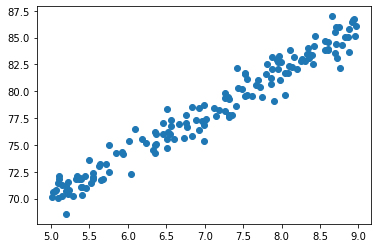

In [32]:
plt.scatter(X_train, y_train)

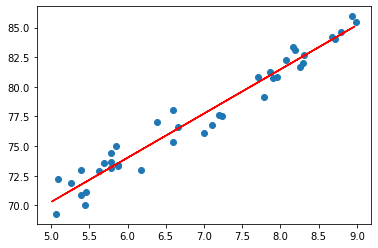

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train),color = "r")

### Present Our Solution

##### Save ML Model 

In [34]:
import joblib
joblib.dump(lr, "Student_mark_Predictor_model.pkl")

['Student_mark_Predictor_model.pkl']

In [35]:
model = joblib.load("Student_mark_Predictor_model.pkl")

In [36]:
model.predict([[4]])[0][0]

66.54273646906665